# Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Mall_Customers dataset

In [3]:
path = "C:\\Users\\bhargav\\Downloads\\Mall_Customers.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.drop(['CustomerID'], axis = 1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# KMeans

### Here I've used `age`, `annual income` and `spending` to cluster customers

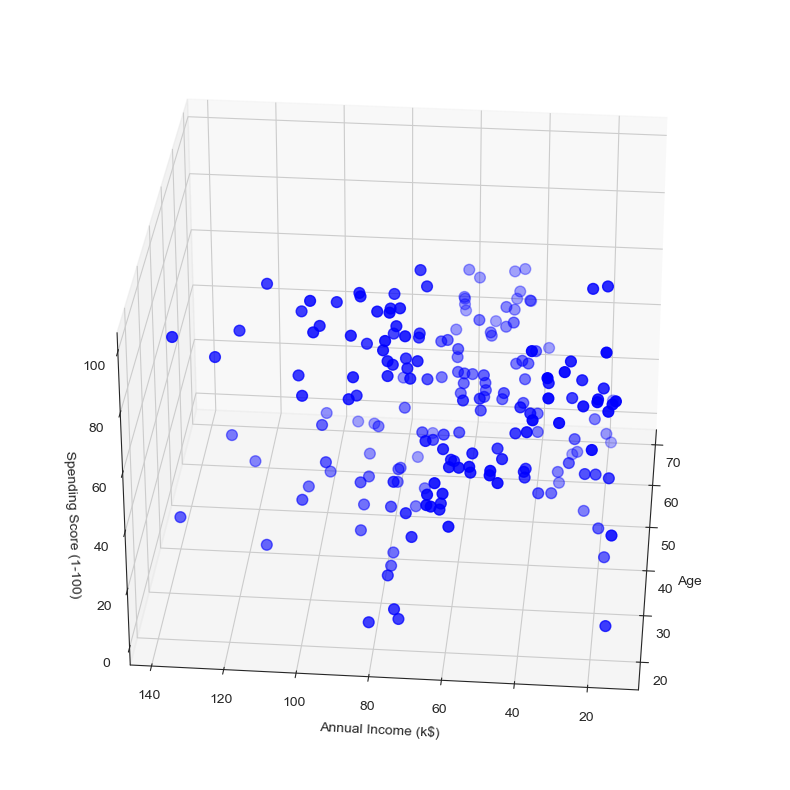

In [8]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## Applying KMeans with k = 5

C:\Users\bhargav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



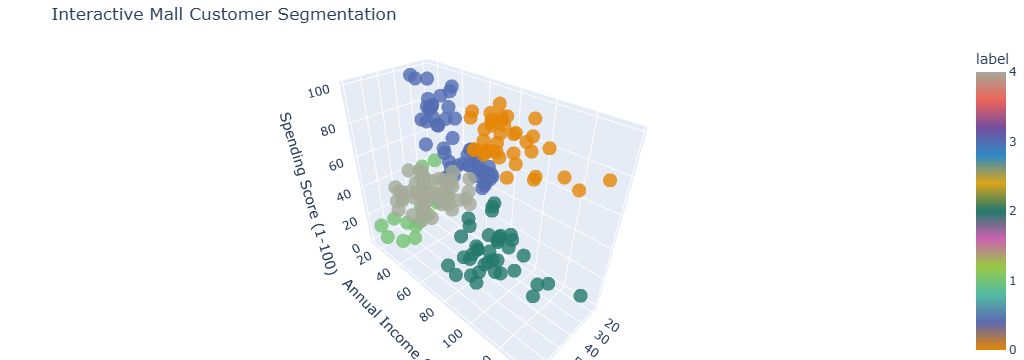

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,2:])

df["label"] = clusters

import plotly.express as px

# Create the interactive 3D scatter plot
fig = px.scatter_3d(df, 
                    x='Age', 
                    y='Annual Income (k$)', 
                    z='Spending Score (1-100)',
                    color='label',  # This automatically colors points by cluster
                    title='Interactive Mall Customer Segmentation',
                    opacity=0.8,
                    color_continuous_scale=px.colors.qualitative.Vivid)

# Improve the layout and sizing
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40),
                  scene=dict(
                      xaxis_title='Age',
                      yaxis_title='Annual Income (k$)',
                      zaxis_title='Spending Score (1-100)'
                  ))

fig.show()

Here we observe 5 clusters<br>
The grouping is based on a combination of age, annual income and spending score. <br>

k1 -> Light Green: Citizens with low income & spending <br>
k2 -> Dark Green: Senior citizens with low spending score<br>
k3 -> Orange: Senior citizens with high spending score<br>
k4 -> Gray: Mid-life citizens with moderate income<br>
k5 -> Dark Blue: Young and frivolous spenders<br>